# Tensorflow Participation: CNN for Digit Recognition
Name:                     
<br>
Student ID:

## 1. Load the image dataset: CIFAR-10

In [ ]:
import tensorflow as tf

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

170498071/170498071 [==============================] - 5s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer",
                   "dog", "frog", "horse", "ship", "truck"]

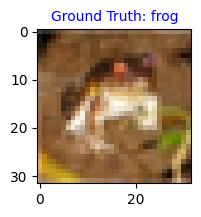

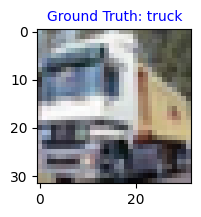

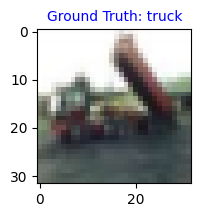

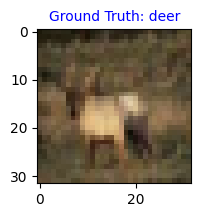

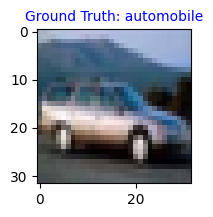

In [ ]:
# take a look at the digit dataset
import matplotlib.pyplot as plt

# show the first n digit image with their labels in a row
n=5

for i in range(n):
    plt.figure(figsize=(2,2))
    plt.imshow(x_train[i])
    plt.title('Ground Truth: ' + str(cifar10_classes[y_train[i,0]]), fontsize=10, color= 'blue')

In [ ]:
print(y_train[i])

[1]


In [ ]:
x_train[0][:,:,0]

array([[ 59,  43,  50, ..., 158, 152, 148],
       [ 16,   0,  18, ..., 123, 119, 122],
       [ 25,  16,  49, ..., 118, 120, 109],
       ...,
       [208, 201, 198, ..., 160,  56,  53],
       [180, 173, 186, ..., 184,  97,  83],
       [177, 168, 179, ..., 216, 151, 123]], dtype=uint8)

## 3. Preprocess the data

In [ ]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=10)
x_train_normalized = tf.keras.utils.normalize(x_train, axis=1) # normalize the data
x_test_normalized = tf.keras.utils.normalize(x_test, axis=1)

## 5. Build a Convolutional Neural network

In [ ]:
# CNN model
cnn_model = tf.keras.models.Sequential()   # Create a sequential model

# Define the network
# 1. add the first convolution layer with 32 filters, each filter is with size 4*4, use 'relu' as the activation funciton.
#    Note for this dataset, the image is colored image, the image size is 32*32*3


# 2. Add the second convolution layer with 20 filters, each filter is with size 4*4, use 'relu' as the activation funciton.


# 3. Add a Flatten layer.


# 4. Add a dense layer with 256 nodes,  use 'relu' as the activation funciton.


# 5. Add a dense layer as the output layer (the number of node should be the same as the number of classes),  use 'softmax' as the activation funciton.


cnn_model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# print model layers
cnn_model.summary()

history = cnn_model.fit(x_train_normalized, y_train_one_hot, epochs=20)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 20)        10260     
                                                                 
 flatten (Flatten)           (None, 13520)             0         
                                                                 
 dense (Dense)               (None, 64)                865344    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 877822 (3.35 MB)
Trainable params: 877822 (3.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
1563/1563

In [ ]:
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
import numpy as np
predictions = cnn_model.predict(x_test_normalized)
y_pred = np.argmax(predictions, axis=1)
print(y_pred)
y_test = y_test.flatten()
print(y_test)
acc = sum(y_pred == y_test)/len(y_test)
print("The accuracy on test set: ", acc)

313/313 [==============================] - 1s 2ms/step
[0 1 0 ... 5 1 7]
[3 8 8 ... 5 1 7]
The accuracy on test set:  0.5637


## 6. Visualization the Prediction

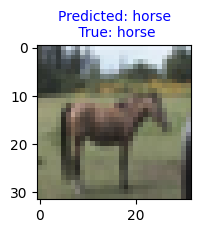

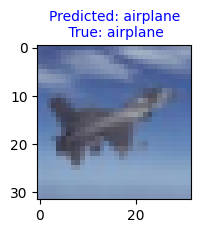

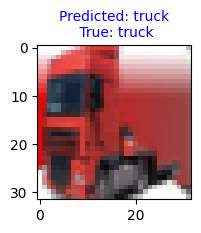

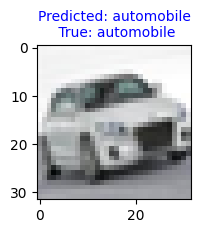

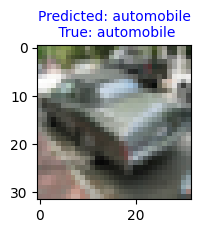

In [ ]:
idx = np.argsort(y_pred==y_test) # sort order: unrecognized first
## print the correct predictions
for i in range(1, n+1):
    plt.figure(figsize=(2,2))
    plt.imshow(x_test[idx[-i]], cmap='gray')
    plt.title('Predicted: ' + str(cifar10_classes[y_pred[idx[-i]]]) + '\n True: ' + str(cifar10_classes[y_test[idx[-i]]]), fontsize=10, color= 'blue')

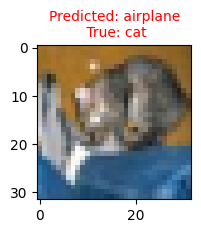

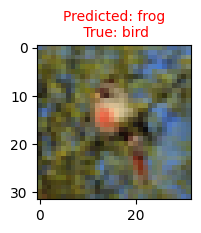

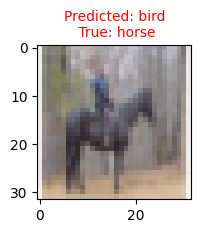

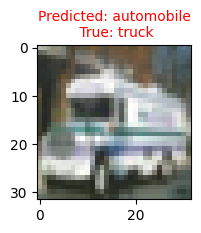

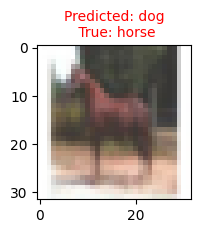

In [ ]:
## print the wrong predictions
for i in range(n):
    plt.figure(figsize=(2,2))
    plt.imshow(x_test[idx[i]], cmap='gray')
    plt.title('Predicted: ' + str(cifar10_classes[y_pred[idx[i]]]) + '\n True: ' + str(cifar10_classes[y_test[idx[i]]]) , fontsize=10, color= 'red')